In [1]:
!pip install numpy 
import numpy as np 
!pip install pandas
import pandas as pd
!pip install seaborn 
import seaborn as sns
!pip install plotly
import plotly.express as px
!pip install matplotlib 
import matplotlib.pyplot as plt
!pip install sklearn
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\pxxjx\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv", encoding ='latin1')

In [3]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
data.drop(['Status','unnamed1'],axis=1, inplace=True)

In [6]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
data.dropna(inplace=True)
data['Amount'] = data['Amount'].astype('int')

In [8]:
data['Amount'].dtypes

dtype('int32')

In [9]:
data.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [10]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [11]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

GENDER

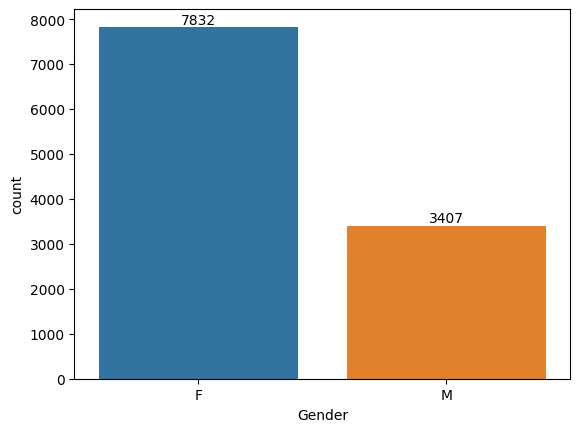

In [12]:
ax = sns.countplot(x = 'Gender',data = data)

for bars in ax.containers:
    ax.bar_label(bars)

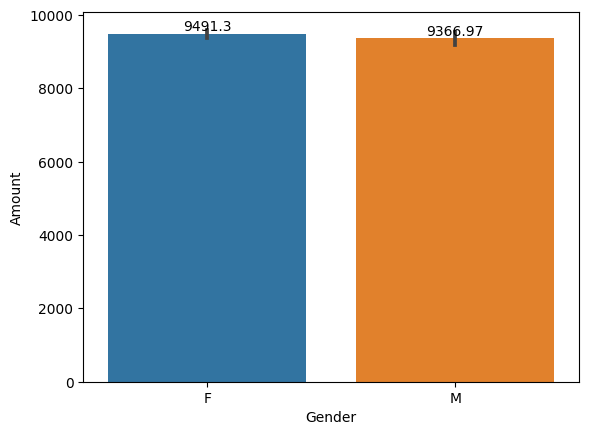

In [13]:
bx = sns.barplot(data=data, x='Gender', y='Amount')
for bars in bx.containers:
    bx.bar_label(bars)

In [14]:
data[['Amount','Orders','Age']].corr()

,Amount,Orders,Age
Amount,1.000000,-0.013184,0.030941
Orders,-0.013184,1.000000,0.008090
Age,0.030941,0.008090,1.000000


<Axes: >

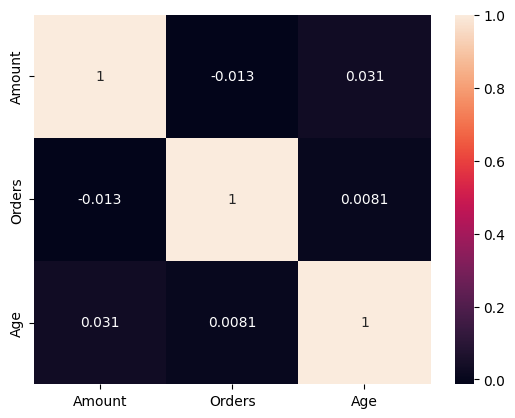

In [15]:
heatmap = data[['Amount','Orders','Age']].corr()
sns.heatmap(heatmap, annot=True)

AGE

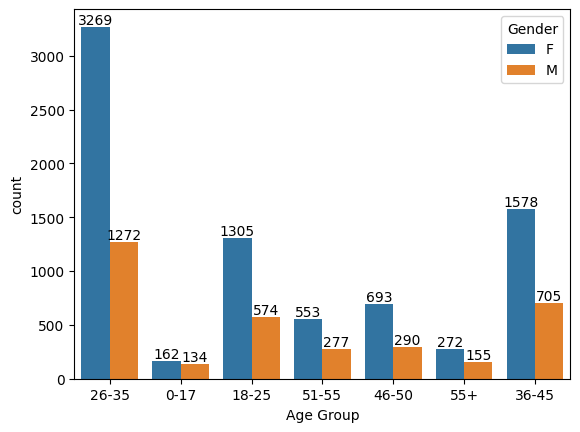

In [16]:
ax = sns.countplot(x = 'Age Group',data = data, hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

ORDERS AND SALES

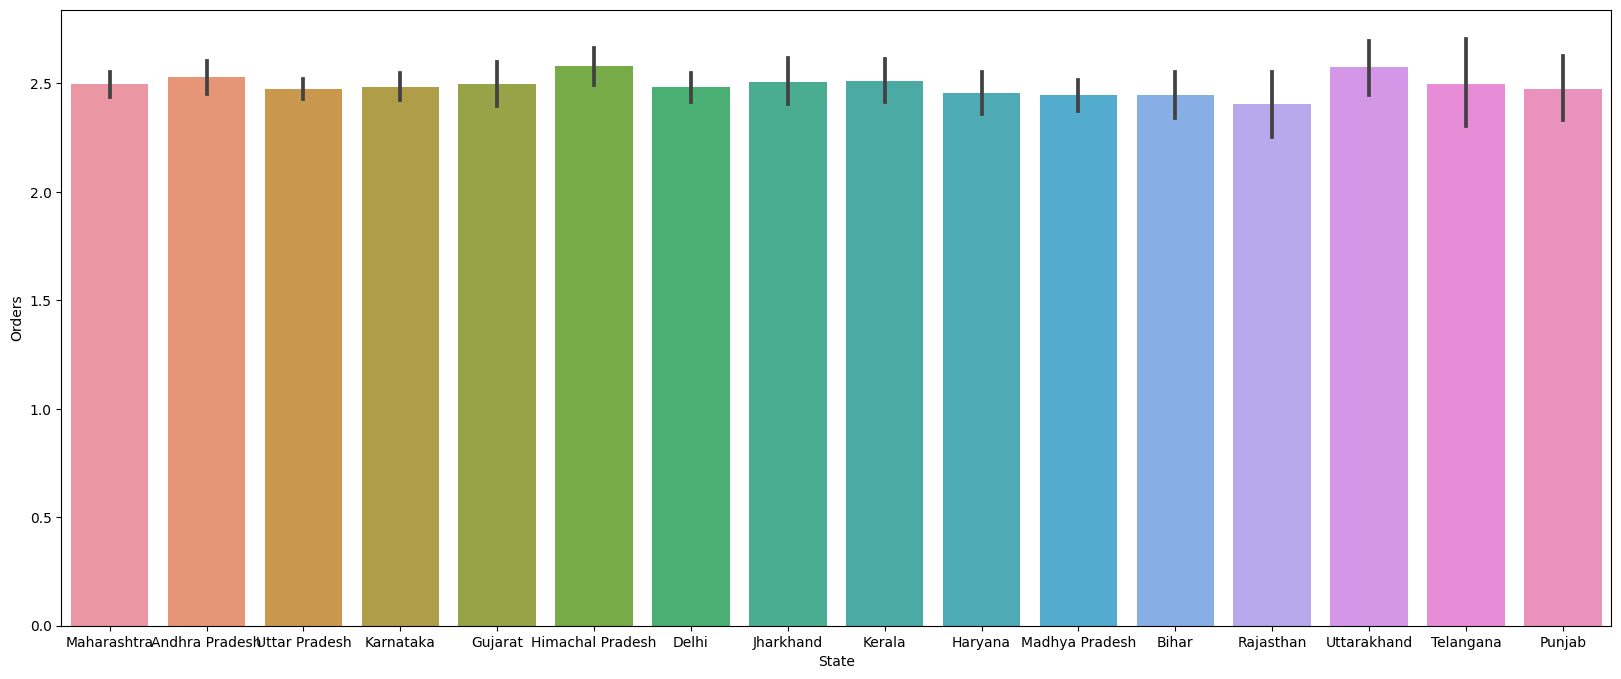

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(data=data, x='State', y='Orders')
plt.show()

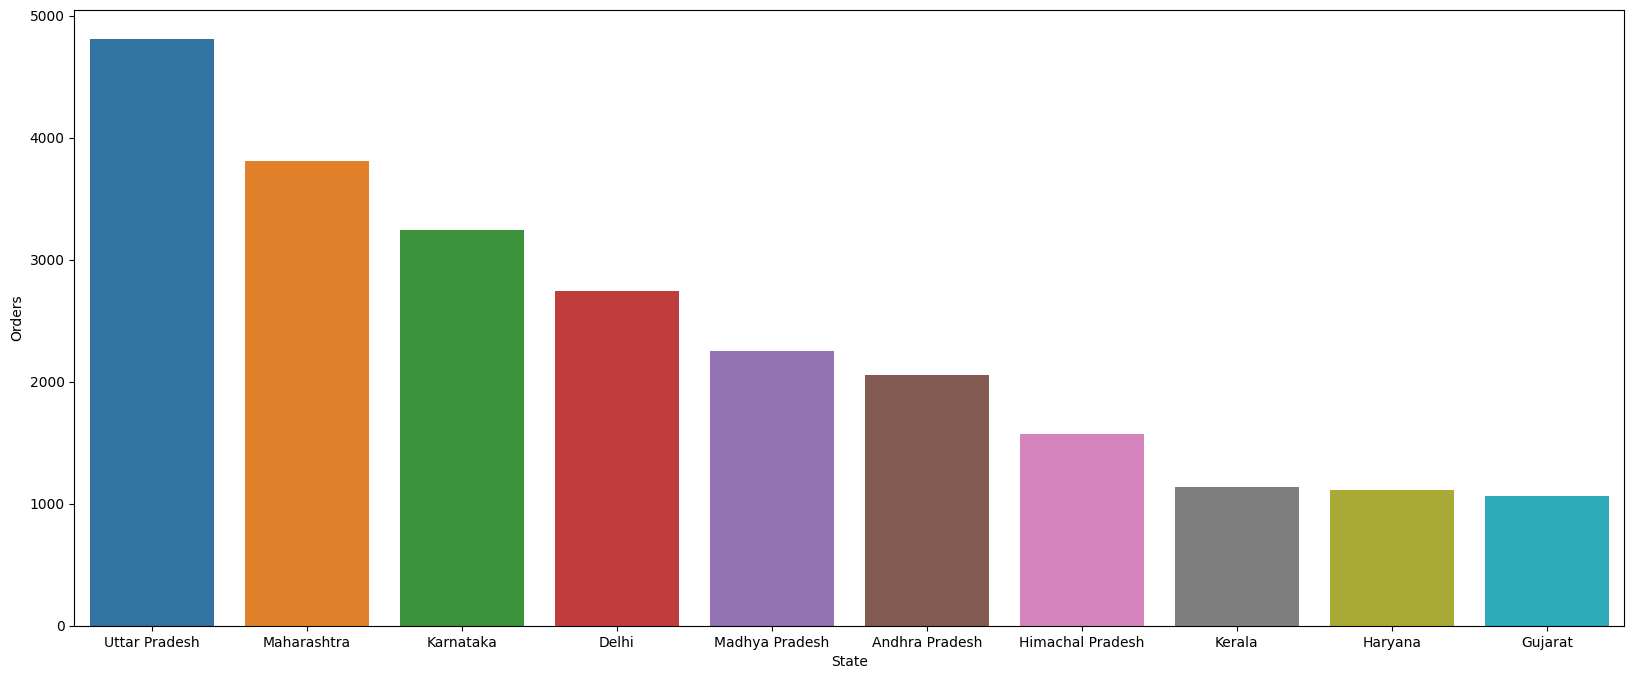

In [24]:
plt.figure(figsize=(20,8))
stat_sales = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data=stat_sales, x='State', y='Orders')
plt.show()

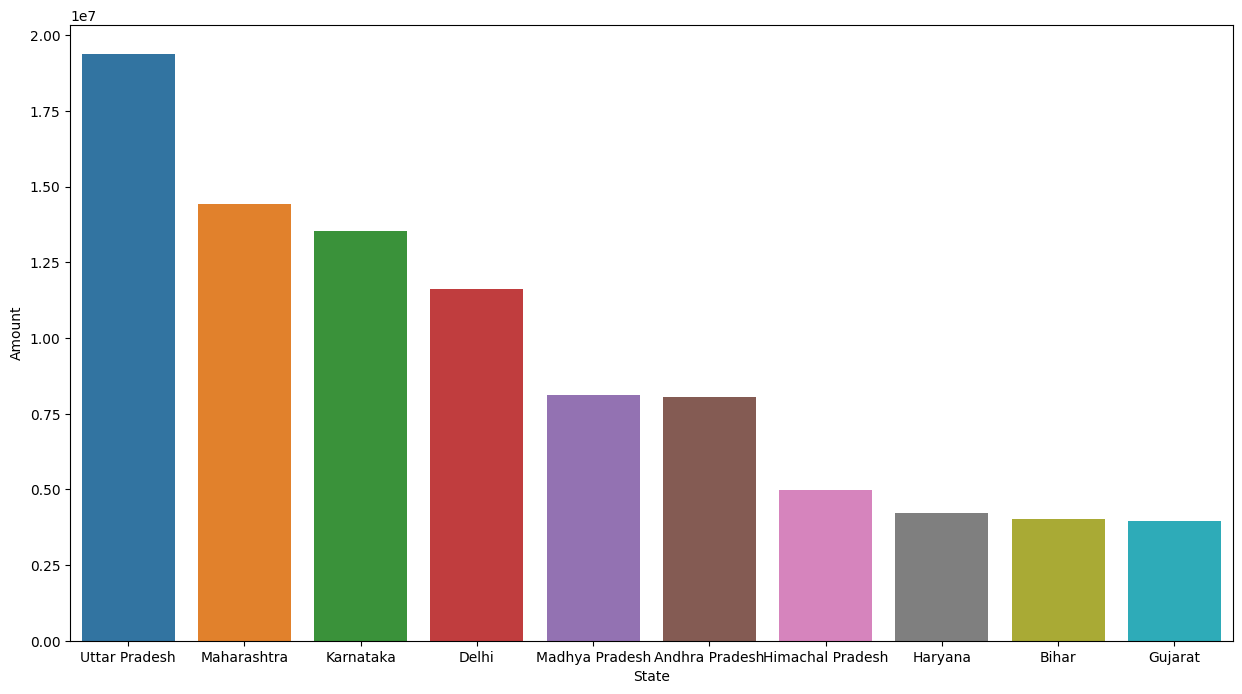

In [27]:
plt.figure(figsize=(15,8))
state_amount = data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data=state_amount, x='State', y='Amount')
plt.show()

In [32]:
'''
ordersAmount = data['stat_sales'].corr(data['state_amount'])
sns.heatmap(data=ordersAmount)
showing error
'''

"\nordersAmount = data['stat_sales'].corr(data['state_amount'])\nsns.heatmap(data=ordersAmount)\nshowing error\n"

MARITAL STATUS

<Axes: xlabel='Marital_Status', ylabel='count'>

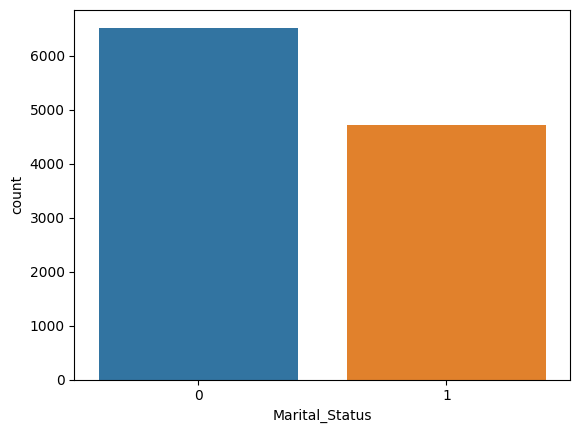

In [33]:
sns.countplot(data=data, x='Marital_Status')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

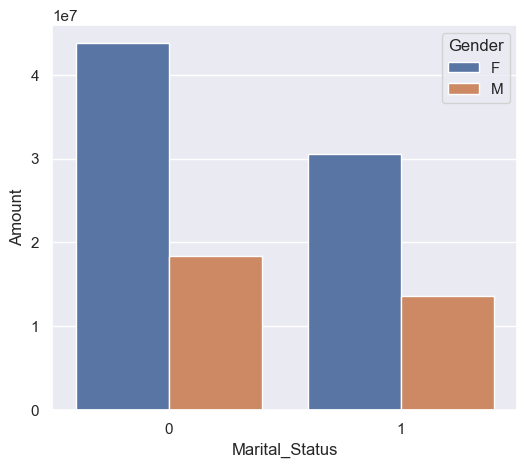

In [34]:
sales_marital = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_marital, x = 'Marital_Status',y= 'Amount', hue='Gender')

OCCUPATION

<Axes: xlabel='Occupation', ylabel='Amount'>

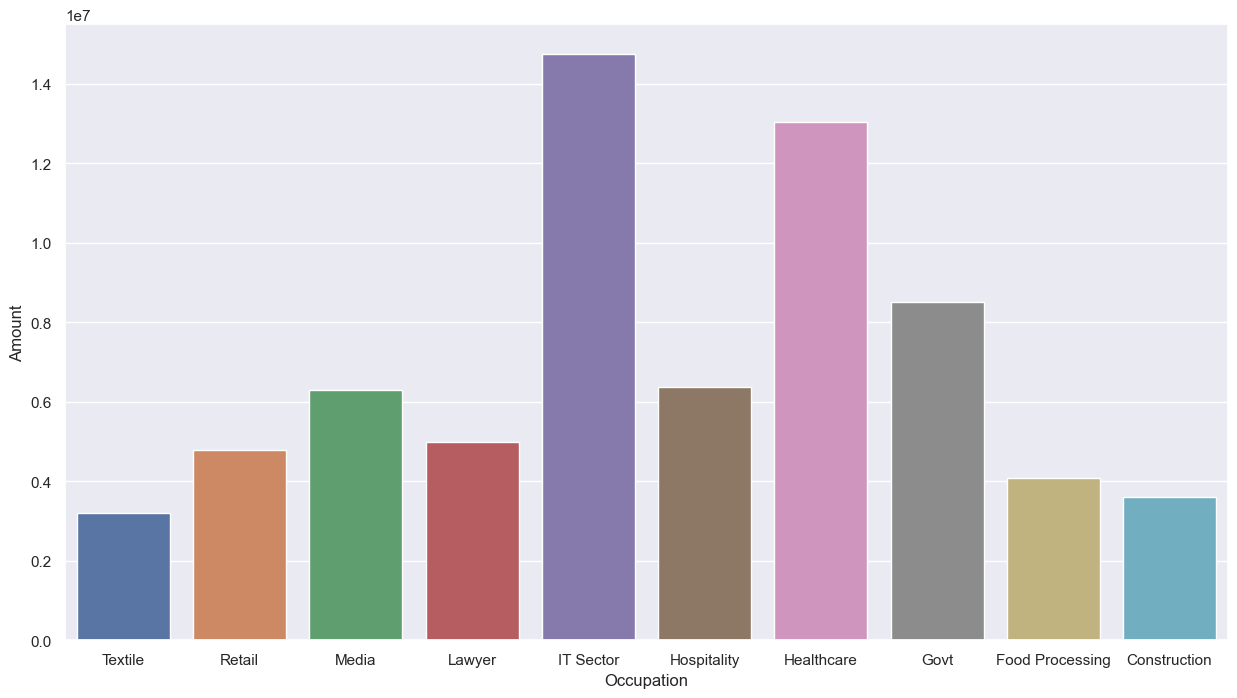

In [39]:
#data['Occupation'] = data['Occupation'].astype('string')
plt.figure(figsize=(15,8))
sales_occu = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Occupation', ascending=False).head(10)
sns.barplot(data=sales_occu, x='Occupation',y='Amount')

PRODUCT CATEGORY

<Axes: xlabel='Product_Category', ylabel='Amount'>

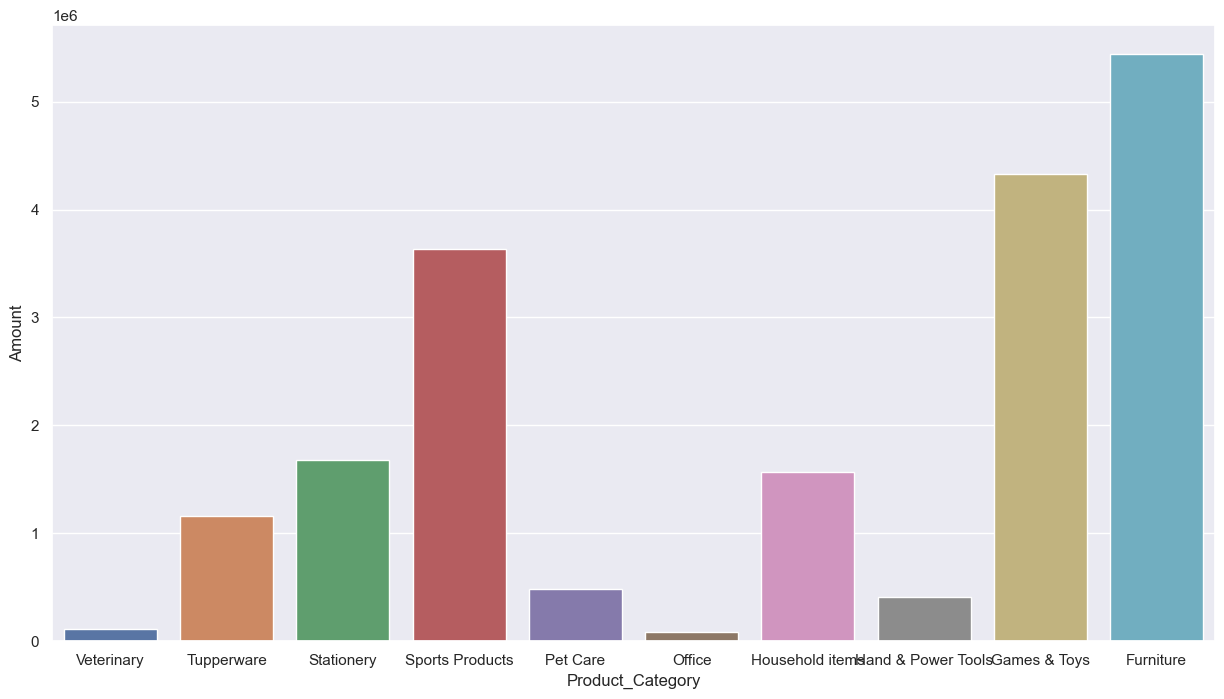

In [40]:
plt.figure(figsize=(15,8))
sales_prod = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Product_Category', ascending=False).head(10)
sns.barplot(data=sales_prod, x='Product_Category',y='Amount')

From the visualizations, it is clear that women have a higher hand in being active in diwali and ordering required products. 